# Assignment 1 The Mandelbrot set


The Mandelbrot set is a 2D set for wicht the function is $$F_c(z)=z^2+c$$. It does not diverge to infinity when iterated starting at $z=0$, for complex numbers $c$. When we have $z_0$ as the first number, we then find $z_1=f_c(z_0)$, $z_2=f_c(z_1),...,z_n=f_c(z_{n-1})$, we can rewrite this as $$z_{n+1}=z_n^2 +c.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import scienceplots
#plt.style.use(['science','no-latex'])
from libraries.mandelbrot_funcs import *
from libraries.sampling_methods import *

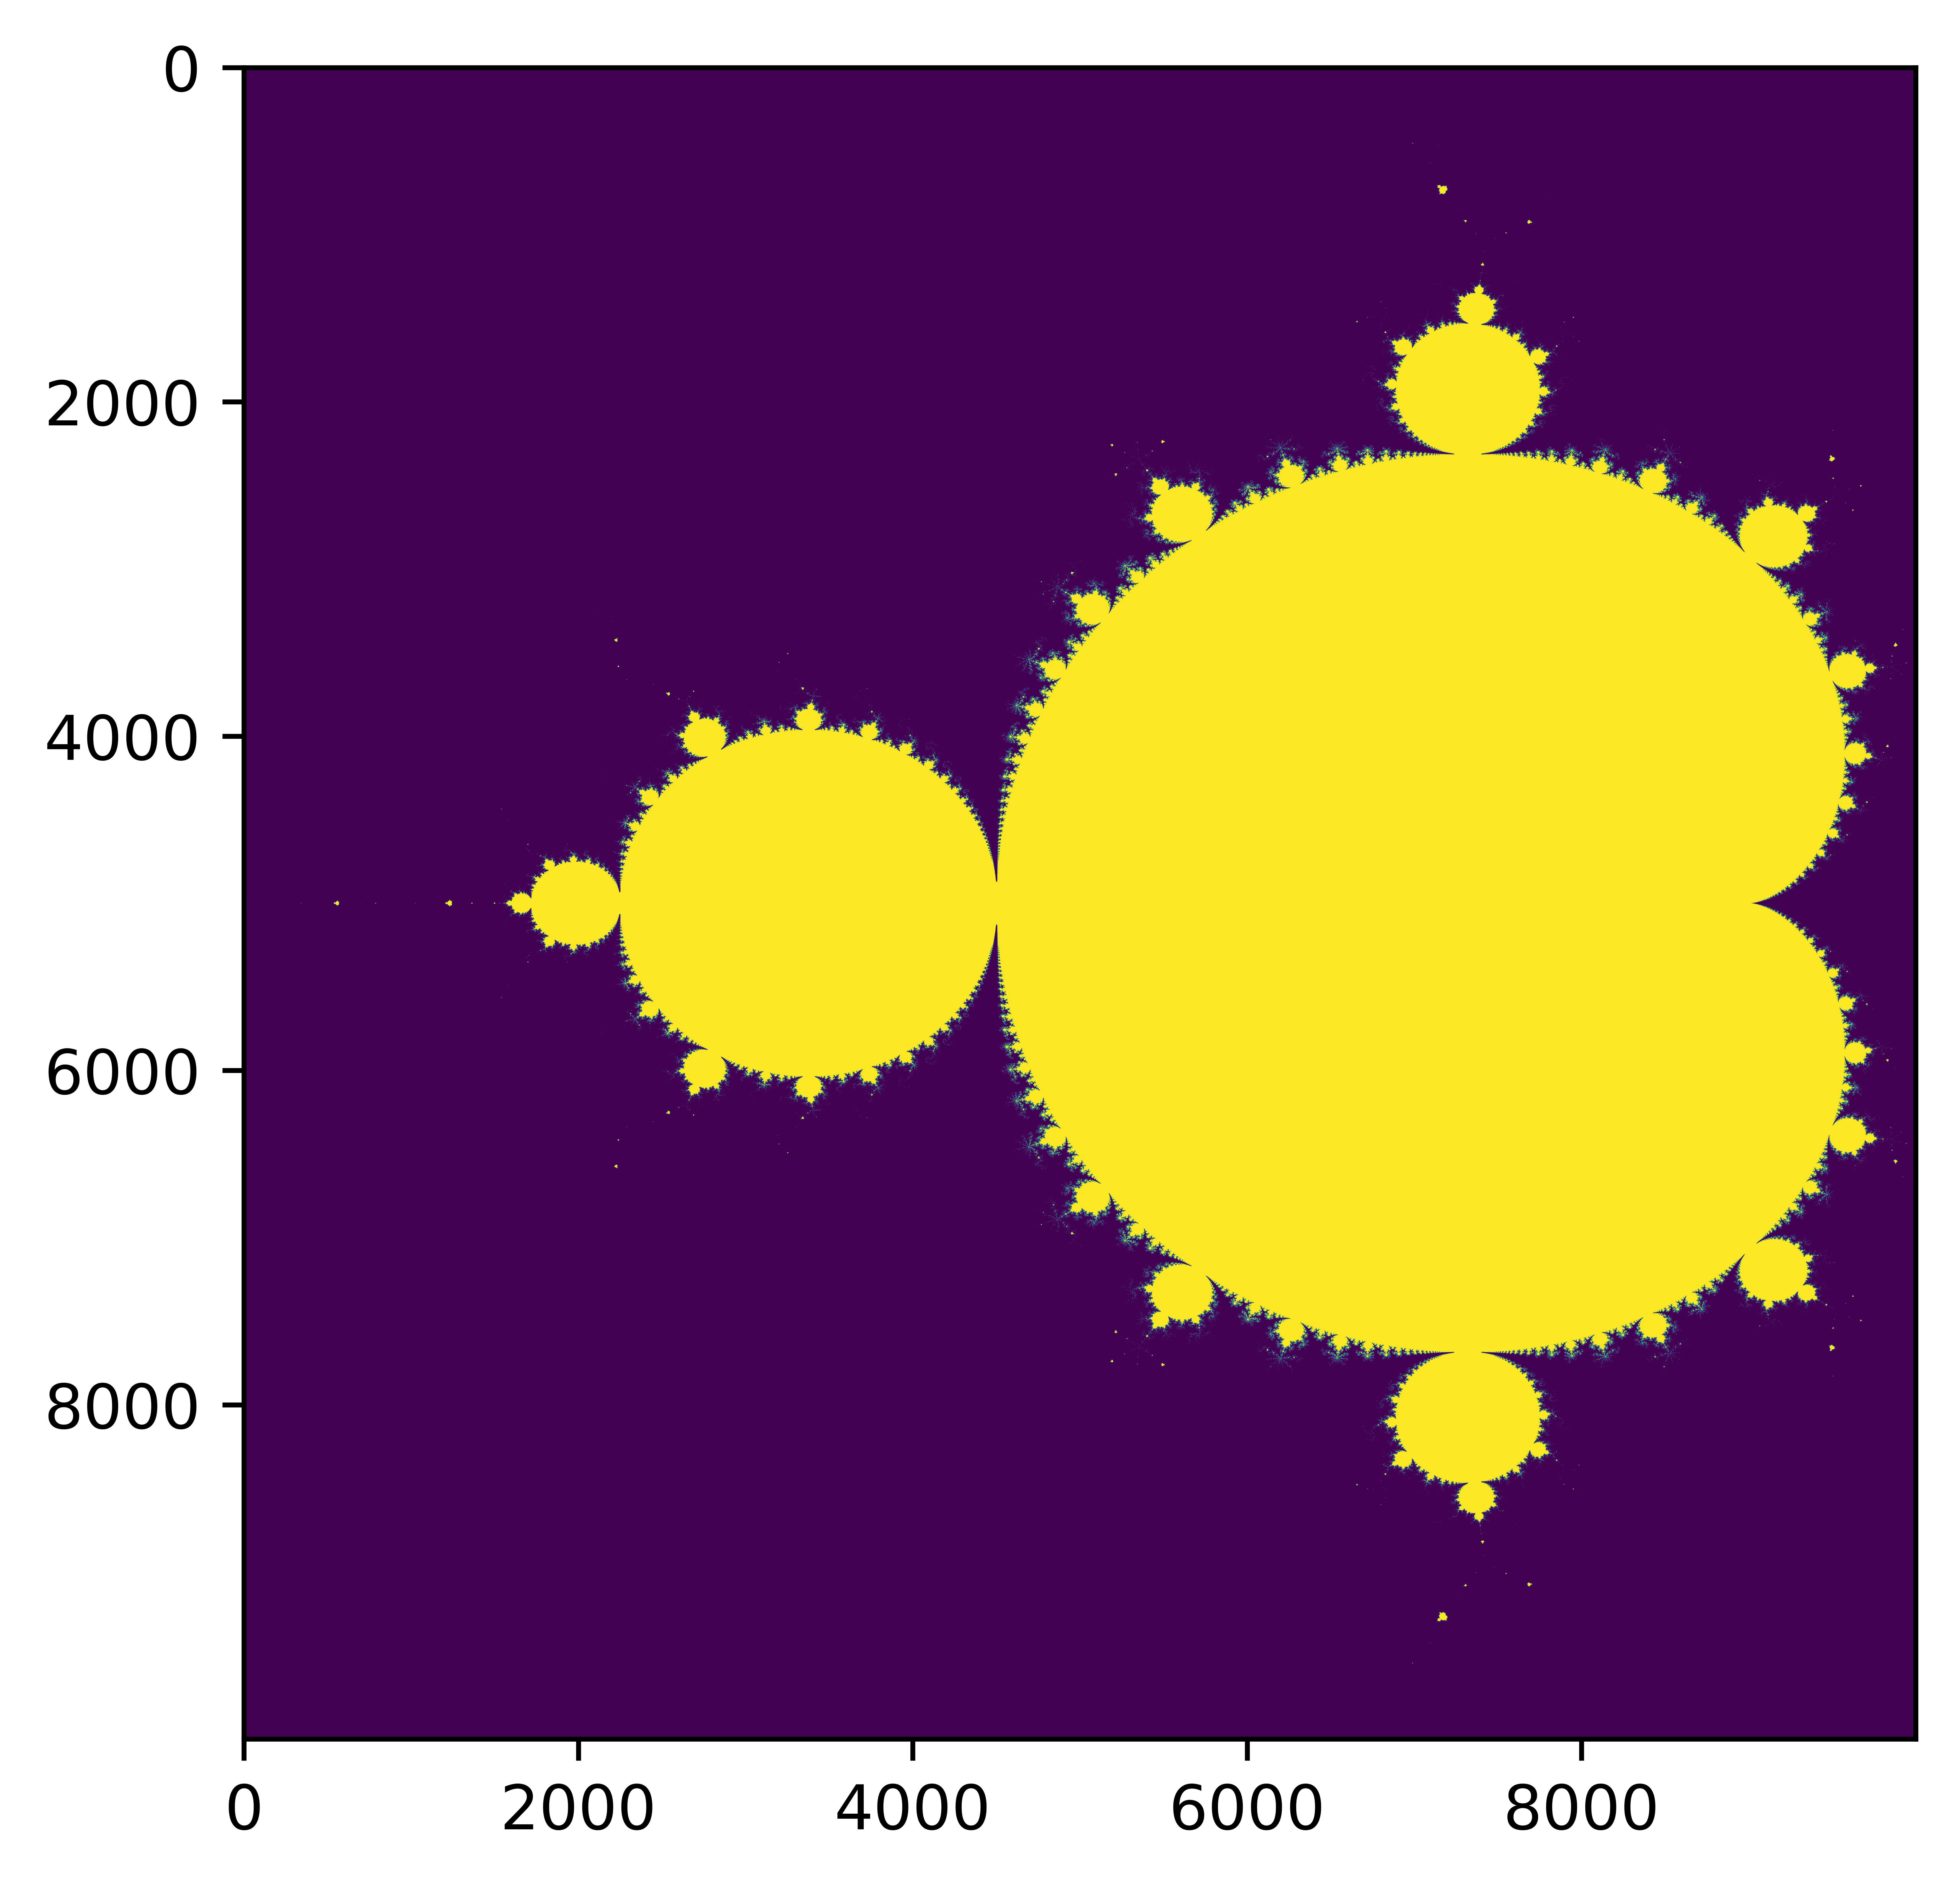

In [2]:
plot_mandelbrot_set(-1.75, 0.47, -1.21, 1.21, 10000, 10000, 256)

Look at the different sizes of area for each sampling method:

In [3]:


mandel1 = MandelbrotSetMC(8000,8000)
area1 = mandel1.area_mandelbrot(2000,256)
print(f'the area of the mandelbrot set using Monte Carlo Sampling is {area1:.4f}')

mandel2 = MandelbrotSetLHS(8000,8000)
area2 = mandel2.area_mandelbrot(2000,256)
print(f'the area of the mandelbrot set using LHS is {area2:.4f}')

mandel3 = MandelbrotSetOrt(8000,8000)
area3 = mandel3.area_mandelbrot(2000,256)
print(f'the area of the mandelbrot set using Orth Sampling is {area3:.4f}')





the area of the mandelbrot set using Monte Carlo Sampling is 1.5768
the area of the mandelbrot set using LHS is 1.5354
the area of the mandelbrot set using Orth Sampling is 1.5824


## variation in number of iterations

Below we will show how varying the number of mandelbrot iterations will affect the value for the calculated area, we will start by doing this

In [4]:
# Plotting the area of the mandelbrot set as a function of the number of iterations
area_list = []
mandel = MandelbrotSetMC(8000,8000)
for i_iterations in range(1,512,4):
    area_list.append(mandel1.area_mandelbrot(s_samples=800000,i_iterations=i_iterations))

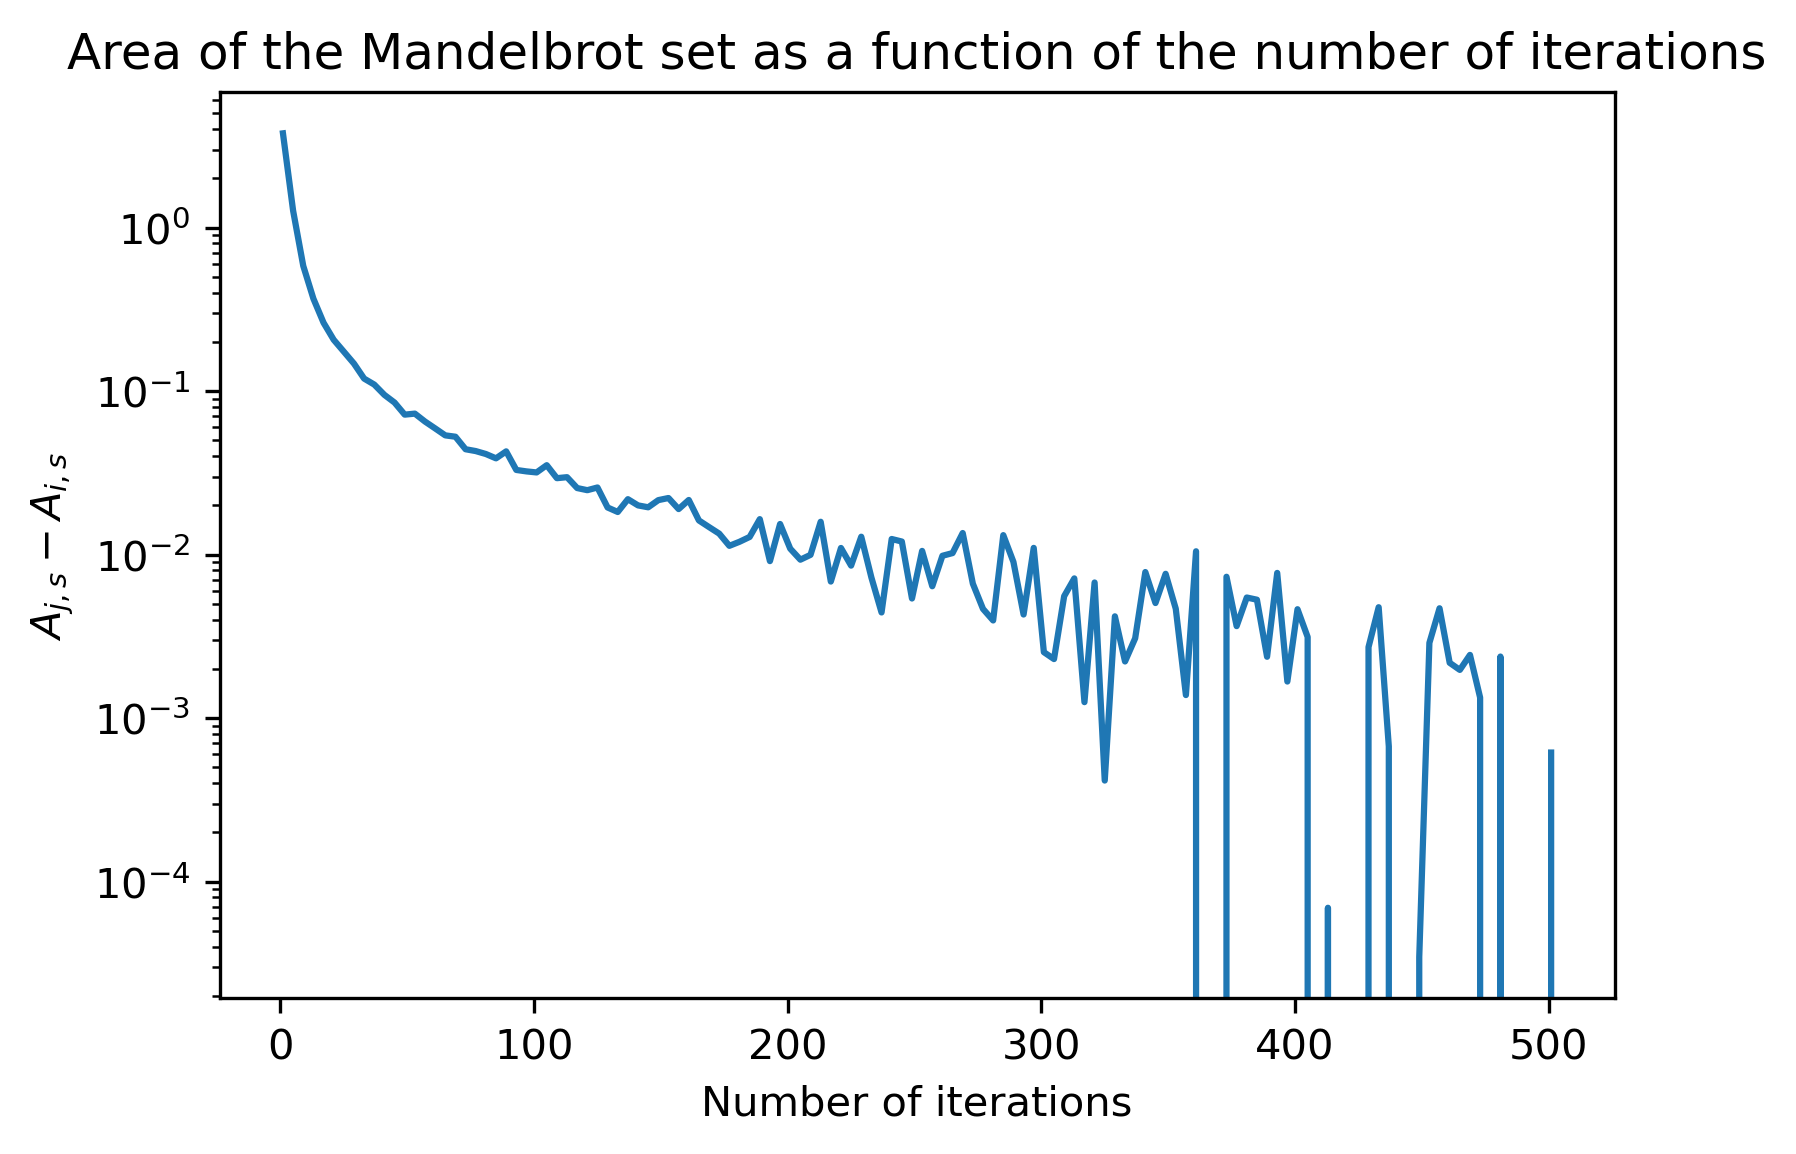

In [5]:
plt.figure(figsize=(6,4),dpi=300)
plt.title('Area of the Mandelbrot set as a function of the number of iterations')
plt.plot(range(1,512,4)[:-2],np.array(area_list[:-2])-area_list[-1])
plt.yscale('log')
plt.ylabel(r'$A_{j,s}-A_{i,s}$')
plt.xlabel('Number of iterations')
plt.show()

Below we calculate the area of the mandelbrot set using 400000 random samples ($\sim0.625\%$ of the # of gridpoints) with a coordinate grid size of 8000x8000. We then plot a histogram to check whether the distribution is as expected, a normal distribution. The below is done for 50 area calculations using a random uniform number generator where indices are drawn from this generator.

In [6]:
areas = []
mandel = MandelbrotSetMC(8000,8000)
for _ in range(50):
    areas.append(mandel.area_mandelbrot(s_samples = 400000,i_iterations=256))


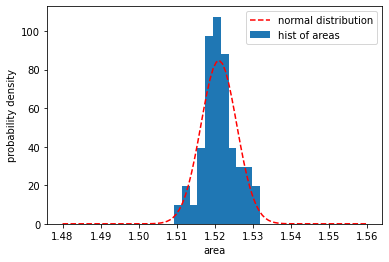

(1.5210870584, 0.004705261145546357, 0.625)

In [7]:
# Plotting the histogram of the areas
plt.hist(areas,bins=11,density=True,label='hist of areas')
# Plotting the normal distribution
s = np.std(areas)
mu = np.mean(areas)
normal_distri_func = lambda x: 1/(s*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*s**2))
x = np.linspace(1.48,1.56,100)
plt.plot(x,normal_distri_func(x),'r--',label='normal distribution')
plt.xlabel('area')
plt.ylabel('probability density')
plt.legend()
plt.show()
mu, s, 400000/(8000*8000)*100

In [8]:
plt.figure(figsize=(5,5),dpi=600)
plt.imshow(full.reshape(8000,8000))

NameError: name 'full' is not defined

<Figure size 3000x3000 with 0 Axes>

In [13]:
i = 256
samples = [100, 500, 1000, 5000, 10000] 
rep = 10

mc = MandelbrotSetMC()
lhs = MandelbrotSetLHS()
ort = MandelbrotSetOrt()

def run_experiment(method, i, s, rep):
    areas = []
    for _ in range(rep):
        area = method.area_mandelbrot(s, i)
        areas.append(area)
    return np.mean(areas), np.var(areas)


In [14]:
results = {}
for s in samples:
    results[(i, s, 'MC')] = run_experiment(mc, i, s, rep)
    results[(i, s, 'LHS')] = run_experiment(lhs, i, s, rep)
    results[(i, s, 'ORT')] = run_experiment(ort, i, s, rep)

In [15]:
def statistics(results, method):
    means = []
    variances = []
    for s in samples:
        mean_area, variance = results[(i,s, method)]
        means.append(mean_area)
        variances.append(variance)
    avg_mean =np.mean(means)
    avg_variance =np.mean(variances)
    stdv = np.sqrt(avg_variance)
    return avg_mean, avg_variance, stdv


avg_mean_mc, avg_variance_mc, std_dev_mc = statistics(results, 'MC')
avg_mean_lhs, avg_variance_lhs, std_dev_lhs =statistics(results, 'LHS')
avg_mean_ort, avg_variance_ort, std_dev_ort = statistics(results, 'ORT')
print("Monte Carlo Method:")
print(f"Average Mean Area: {avg_mean_mc}, Average Variance: {avg_variance_mc}, Standard Deviation: {std_dev_mc}")
print("\nLatin Hypercube Sampling Method:")
print(f"Average Mean Area: {avg_mean_lhs}, Average Variance: {avg_variance_lhs}, Standard Deviation: {std_dev_lhs}")
print("\nOrthogonal Sampling Method:")
print(f"Average Mean Area: {avg_mean_ort}, Average Variance: {avg_variance_ort}, Standard Deviation: {std_dev_ort}")

Monte Carlo Method:
Average Mean Area: 1.4876813952, Average Variance: 0.010607259873566718, Standard Deviation: 0.10299155243789035

Latin Hypercube Sampling Method:
Average Mean Area: 1.5346327360000003, Average Variance: 0.004347433097382503, Standard Deviation: 0.0659350672812465

Orthogonal Sampling Method:
Average Mean Area: 1.5422348032, Average Variance: 0.010763013097840642, Standard Deviation: 0.10374494251692774


In [16]:
def plot_results(results,name, color):
    res = {key[:2]: value for key, value in results.items() if key[2] == name}
    iterations = sorted(set(i for i, s in res))
    samples =sorted(set(s for i,s in res))
    
    for i in iterations:
        mean_areas = [res[(i,s)][0] for s in samples]
        variances = [res[(i,s)][1] for s in samples]
        
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(samples, mean_areas, label=f'Iterations={i}', color=color)
        plt.xlabel('Samples')
        plt.ylabel('Mean Area')
        plt.title(f'Mean Area vs. Samples for {name}')
        plt.legend()
        plt.subplot(1, 2,2)
        plt.plot(samples, variances, label=f'Iterations={i}', color=color)
        plt.xlabel('Samples')
        plt.ylabel('Variance')
        plt.title(f'Variance vs. Samples for {name}')
        plt.legend()

    plt.show()

In [ ]:
plot_results(results, 'MC', 'blue')
plot_results(results, 'LHS', 'green')
plot_results(results, 'ORT', 'red')